In [1]:
#clustering using GMM,KMeans,DBSCAN
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X= df.drop(columns = 'species')
features = pca.fit_transform(X)

<Axes: xlabel='0', ylabel='1'>

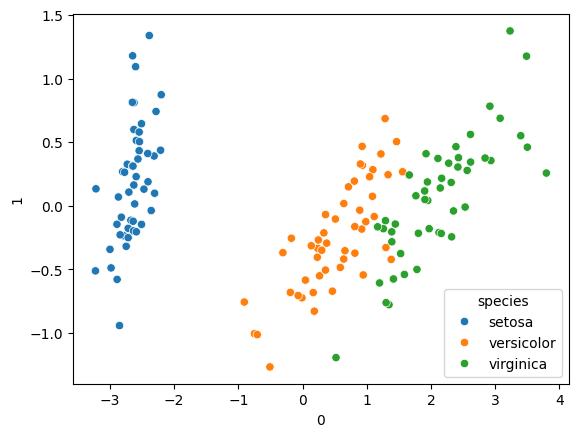

In [6]:
import pandas as pd
features_df=pd.DataFrame(features,columns=['0','1'])
sns.scatterplot(features_df,x=features_df['0'],y=features_df['1'],hue=df.species)

<Axes: xlabel='0', ylabel='1'>

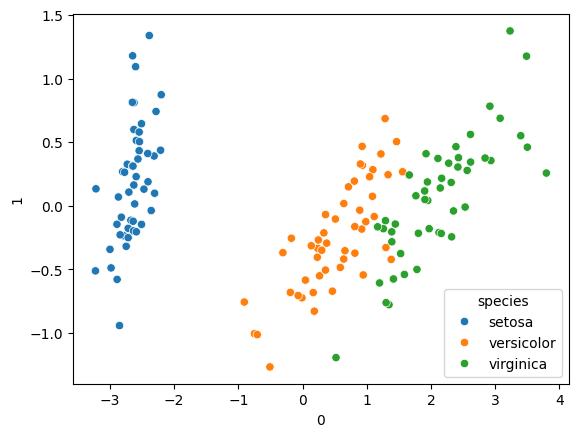

In [5]:
import pandas as pd
features_df = pd.DataFrame(features, columns=['0', '1'])
sns.scatterplot(features_df, x=features_df['0'], y=features_df['1'], hue=df.species)

In [7]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(features_df)
gmm_cluster = gmm.predict(features_df)

<Axes: xlabel='0', ylabel='1'>

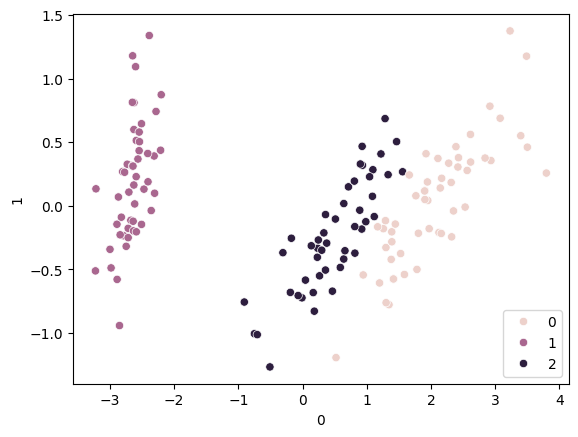

In [9]:
sns.scatterplot(features_df,x=features_df['0'],y=features_df['1'],hue = gmm_cluster)

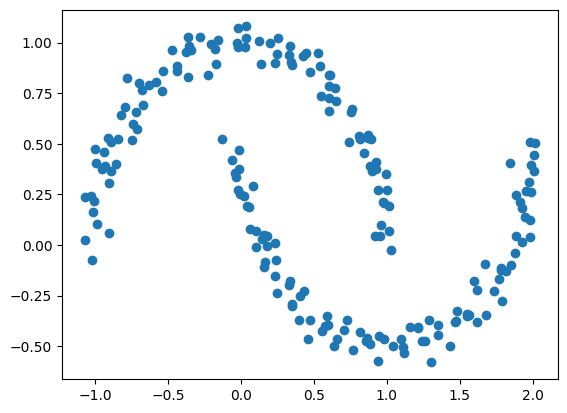

In [11]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
Xmoon,ymoon = make_moons(200,noise= 0.05,random_state = 0)
plt.scatter(Xmoon[:,0],Xmoon[:,1]);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


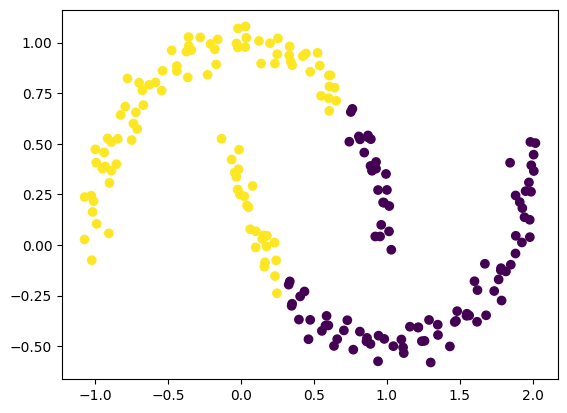

In [13]:
from sklearn.cluster import KMeans,DBSCAN
Kmeans = KMeans(n_clusters=2,random_state=786)
Kmeans.fit(Xmoon)
Kmeans_clusters = Kmeans.predict(Xmoon)
plt.scatter(Xmoon[:,0],Xmoon[:,1],c=Kmeans_clusters,cmap = 'viridis')

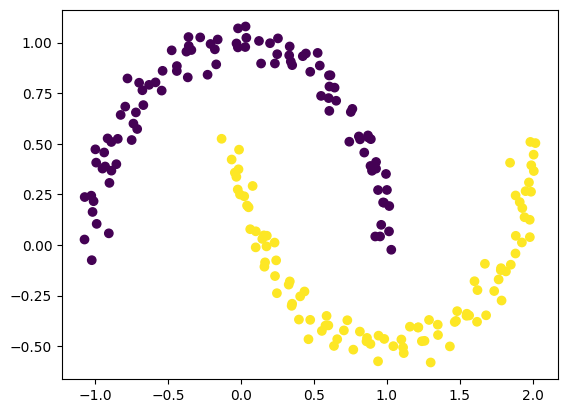

In [17]:
dbscan = DBSCAN(eps=0.2,min_samples = 5)
dbscan.fit(Xmoon)
dbscan_clusters=dbscan.labels_
plt.scatter(Xmoon[:, 0],Xmoon[:,1],c=dbscan_clusters,cmap='viridis')